   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
(18288, 3)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


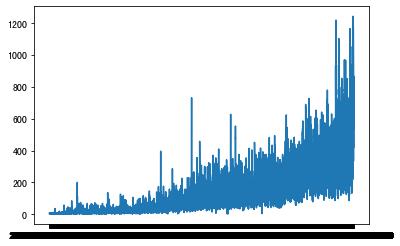

In [42]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 数据加载及探索
train = pd.read_csv('./train.csv')
print(train.head())
print(train.shape)
plt.plot(train['Datetime'],train['Count'])
plt.show()


In [40]:
###数据处理###
#日期格式转换3#
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train['Datetime']
train.head()
# 去除一些字段#
train.drop(['ID','Datetime'],axis=1,inplace=True)
train.head()
# 转化为天 #
train_daily=train.resample('D').sum()
train_daily

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [41]:
###模型评估与预测###
train_daily['ds'] = train_daily.index
train_daily['y'] = train_daily.Count
train_daily.drop(['Count'],axis = 1, inplace = True)

#拟合Prophet模型
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(train_daily)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


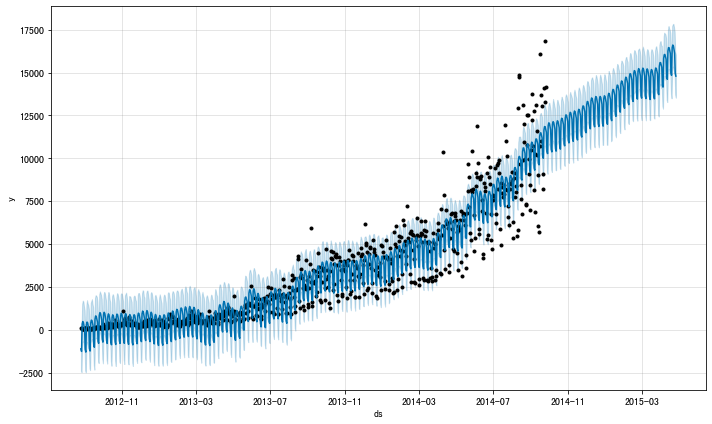

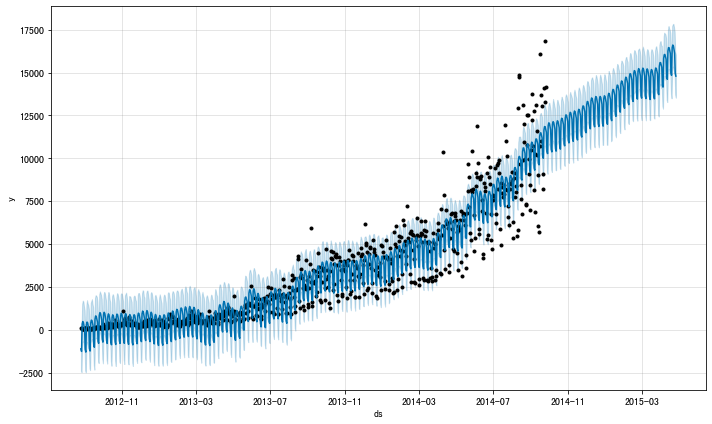

In [35]:
m.plot(forecast)

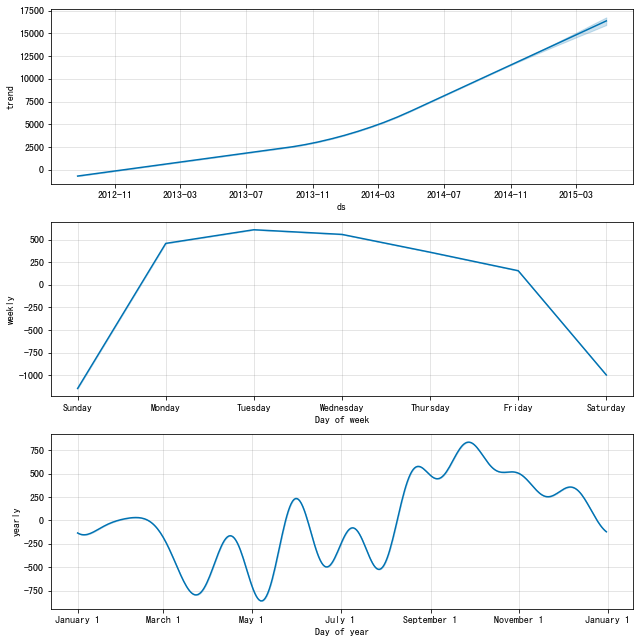

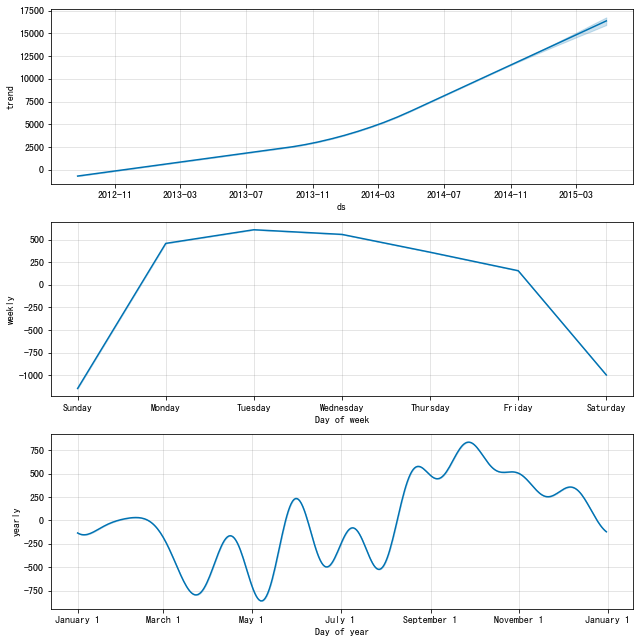

In [36]:
# 查看各个成分
m.plot_components(forecast)

In [37]:
print(forecast)

            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -687.216303  -2383.311112    193.976105   -687.216303   
1   2012-08-26   -679.114521  -2467.905584     47.292440   -679.114521   
2   2012-08-27   -671.012739   -760.378725   1509.810822   -671.012739   
3   2012-08-28   -662.910957   -682.614828   1704.700209   -662.910957   
4   2012-08-29   -654.809174   -701.403414   1646.442448   -654.809174   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16251.283611  15302.714110  17839.454883  15810.856223   
971 2015-04-23  16278.812096  15078.855926  17644.866835  15833.682550   
972 2015-04-24  16306.340581  14851.385948  17392.336973  15859.715379   
973 2015-04-25  16333.869066  13712.026675  16207.188097  15882.240391   
974 2015-04-26  16361.397551  13533.037617  16044.921341  15904.603468   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -687.216303     -423.576